In [15]:
import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [17]:
filmes.columns = ['filme_Id','titulo','generos']
filmes.head(10)

,filme_Id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [19]:
filmes.generos #Tipo de dados series
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
dados_dos_filmes = pd.concat([filmes,generos],axis=1)
dados_dos_filmes.head()

,filme_Id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados # Varia de -1 a 1

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [23]:
generos_escalados.shape

(9742, 20)

##### Isso mostra que a forma ainda é a mesma.

In [26]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_)) 

Grupos [0 0 2 ... 2 1 2]


##### Mostrar os rótulos criados pelo o KMeans()

In [28]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-5.91799474e-02 -1.83013614e-01  1.01314862e+00  1.91124535e+00
   3.15879142e+00  3.04886042e-01 -3.22972356e-01 -2.11202997e-01
  -5.79948409e-01  1.06248133e+00 -9.49256298e-02 -2.77582044e-01
   2.33333693e-01  5.29040678e-01 -1.27917830e-01 -2.55691592e-01
  -3.49644443e-02 -4.71466445e-01 -1.81842047e-01 -7.17201026e-02]
 [-5.91799474e-02  1.51565624e+00  4.97817691e-01 -3.96309427e-02
  -2.66848885e-01 -3.53797170e-01  2.13979495e-01 -2.10931906e-01
  -3.08706750e-01  1.01821024e-01 -6.59755935e-02  1.02471542e-01
   2.77681543e-01 -1.75945639e-01 -3.03848776e-03 -3.26122016e-01
   9.92067029e-01  4.33224578e-01  1.13697155e-01  3.22975871e-02]
 [ 2.59420144e-02 -4.72287356e-01 -2.76504388e-01 -2.032639

In [39]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)


,0,1,2
(no genres listed),-0.059180,-0.059180,0.025942
Action,-0.183014,1.515656,-0.472287
Adventure,1.013149,0.497818,-0.276504
Animation,1.911245,-0.039631,-0.203264
Children,3.158791,-0.266849,-0.270451
Comedy,0.304886,-0.353797,0.080595
Crime,-0.322972,0.213979,-0.033072
Documentary,-0.211203,-0.210932,0.092494
Drama,-0.579948,-0.308707,0.166001
Fantasy,1.062481,0.101821,-0.153281


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c56d1a7d0>,
      dtype=object)

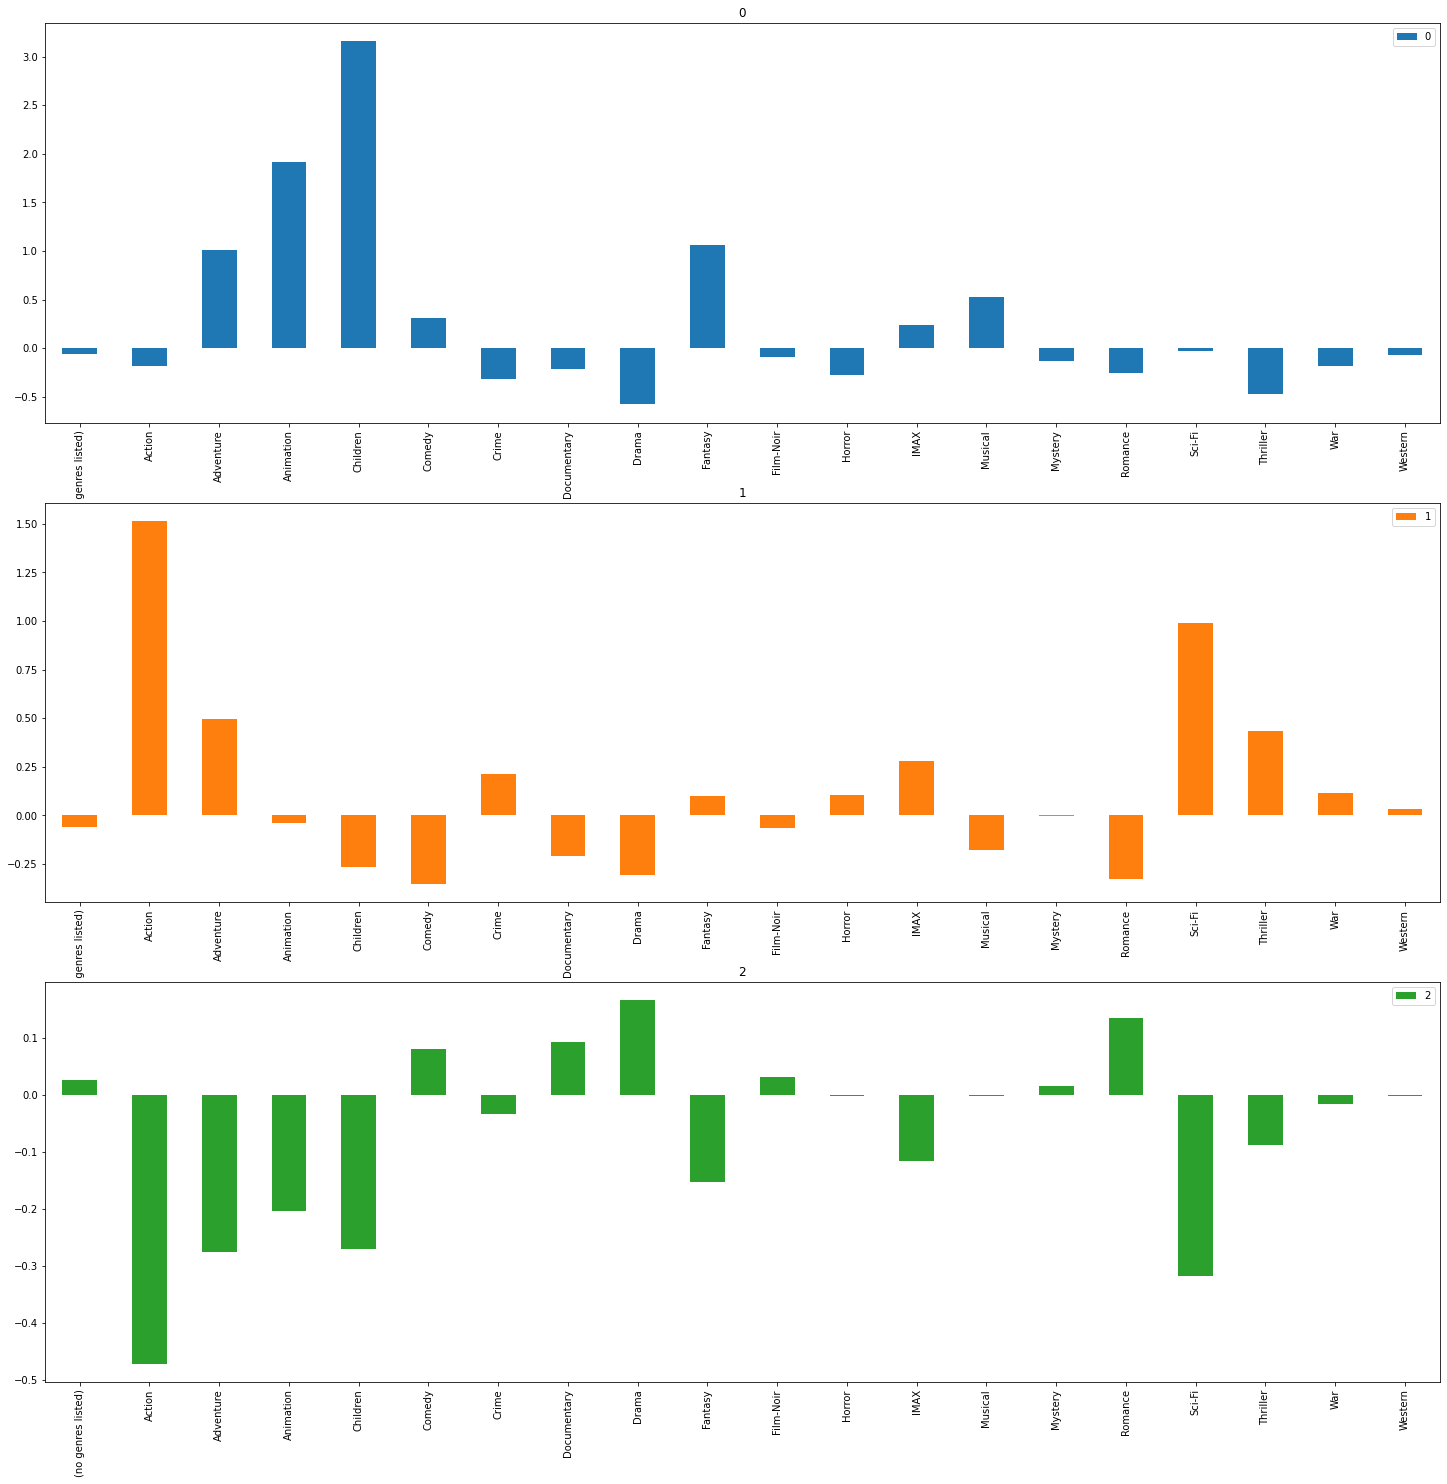

In [43]:
grupos.transpose().plot.bar(subplots=True,
                figsize=(25,25),
               sharex=False)


In [44]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3876,5448,Hey Arnold! The Movie (2002),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1400,1919,Madeline (1998),Children|Comedy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8933,136341,Scooby-Doo! and the Samurai Sword (2009),Animation|Children|Comedy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1558,2095,"Shaggy D.A., The (1976)",Children|Comedy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5615,27075,Addams Family Reunion (1998),Children|Comedy|Fantasy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6792,60516,Meet Dave (2008),Adventure|Children|Comedy|Romance|Sci-Fi,0,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
9629,178827,Paddington 2 (2017),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8638,119155,Night at the Museum: Secret of the Tomb (2014),Adventure|Children|Comedy|Fantasy,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6455,52287,Meet the Robinsons (2007),Action|Adventure|Animation|Children|Comedy|Sci-Fi,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4282,6251,Piglet's Big Movie (2003),Animation|Children,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 65.20057 , -18.767382],
       [-50.645008, -33.41868 ],
       [-29.59605 , -15.013268],
       ...,
       [ 24.957388,  -4.499711],
       [ 63.409843,  29.47537 ],
       [-13.806321,  11.236427]], dtype=float32)

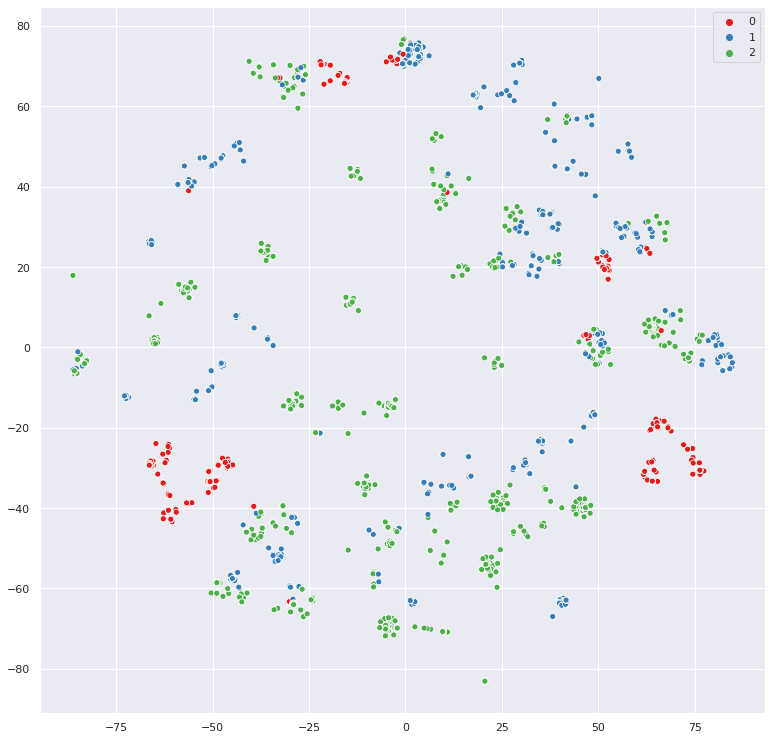

In [54]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1',3))

In [58]:
modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.135994,-0.364298,-0.243681,-0.270451,-0.582936,-0.075774,-0.217489,-0.483410,0.053763,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.373859,-0.286078,2.035586,-0.202020,-0.132065
1,-0.05918,-0.191556,0.911226,-0.258679,3.697524,0.392944,-0.346005,-0.217489,-0.465254,0.860935,-0.094926,-0.313193,-0.128397,-0.188419,-0.116751,-0.307118,0.009485,-0.475417,-0.202020,-0.132065
2,-0.05918,0.149136,0.862656,3.865793,1.557769,0.137516,-0.280295,-0.217489,-0.626012,0.710688,-0.094926,-0.258429,-0.128397,-0.188419,-0.170954,-0.280746,0.263161,-0.470376,-0.180730,-0.132065
3,-0.05918,-0.120392,-0.126881,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.948297,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
4,-0.05918,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c4cdb94d0>,
      dtype=object)

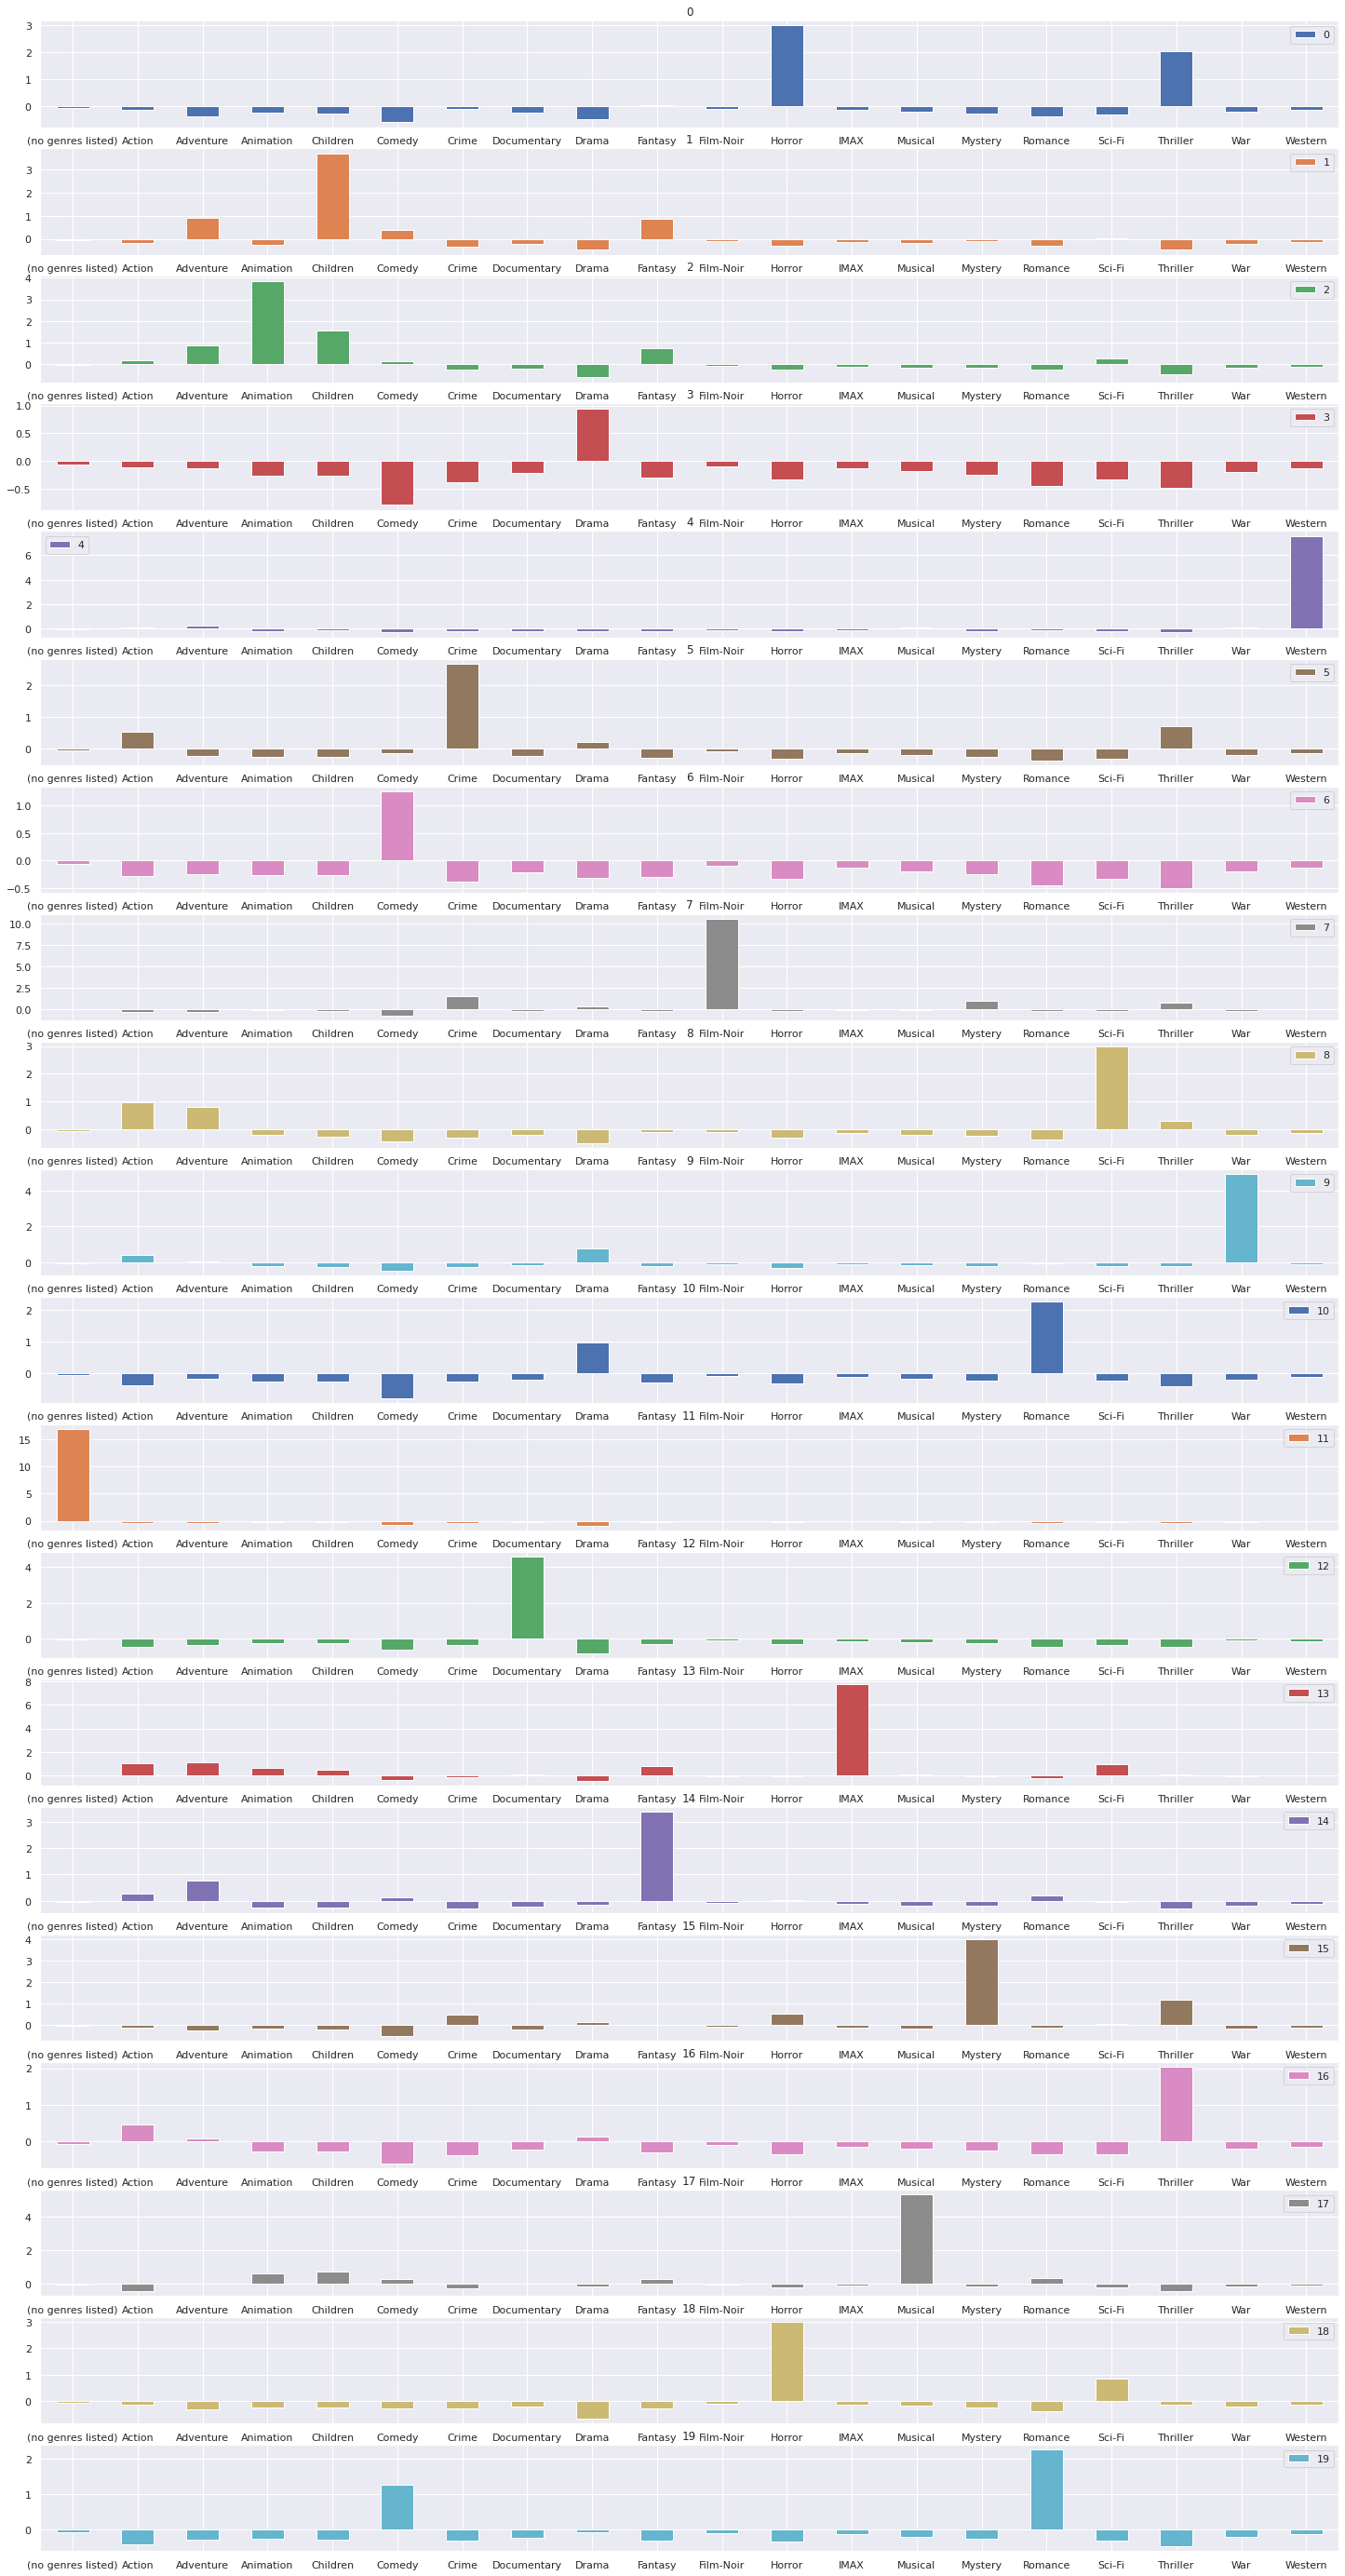

In [62]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [64]:
def kmeans(numero_de_clusters,generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [65]:
kmeans(20, generos_escalados)

[20, 55416.423789042994]

In [66]:
kmeans(3, generos_escalados)

[3, 166070.99613504743]

In [67]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179543.6812608866],
 [3, 168285.5664349404],
 [4, 155840.82049147986],
 [5, 146738.31857631105],
 [6, 139139.20434051676],
 [7, 129628.52283096609],
 [8, 120822.94665293756],
 [9, 110621.62222933295],
 [10, 101225.303061633],
 [11, 94334.37639455692],
 [12, 85691.04830041008],
 [13, 81276.42253029844],
 [14, 74841.00955127557],
 [15, 67650.08277322278],
 [16, 63189.304888797036],
 [17, 61526.82504856068],
 [18, 58947.68381477891],
 [19, 58133.65420540225],
 [20, 56251.74819943555],
 [21, 53359.34557136016],
 [22, 52859.37707923456],
 [23, 50687.63552909554],
 [24, 49817.322962484606],
 [25, 48617.94251310232],
 [26, 46634.78274123283],
 [27, 45745.31526763809],
 [28, 45198.96677044893],
 [29, 43658.32723885101],
 [30, 43130.81540118525],
 [31, 41544.17765195222],
 [32, 40803.53298112795],
 [33, 39948.44019077891],
 [34, 40021.49220167801],
 [35, 38932.26996334099],
 [36, 37616.06358644015],
 [37, 37564.89130457821],
 [38, 36514.78064204902],
 [39, 35985.89184329272

In [68]:
resultado = pd.DataFrame(resultado,
            columns=['grupos','inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179543.681261
2,3,168285.566435
3,4,155840.820491
4,5,146738.318576
5,6,139139.204341
6,7,129628.522831
7,8,120822.946653
8,9,110621.622229
9,10,101225.303062


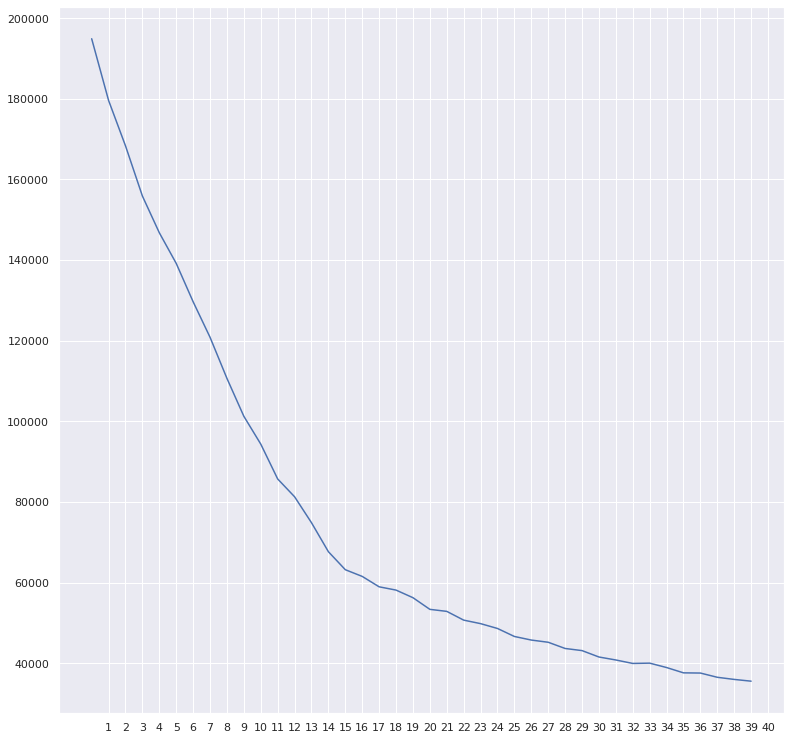

In [72]:
resultado.inertia.plot(xticks=resultado.grupos)

#### Método do cotovelo, ponto de quebra(Elbow point)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c4d7f5e90>,
      dtype=object)

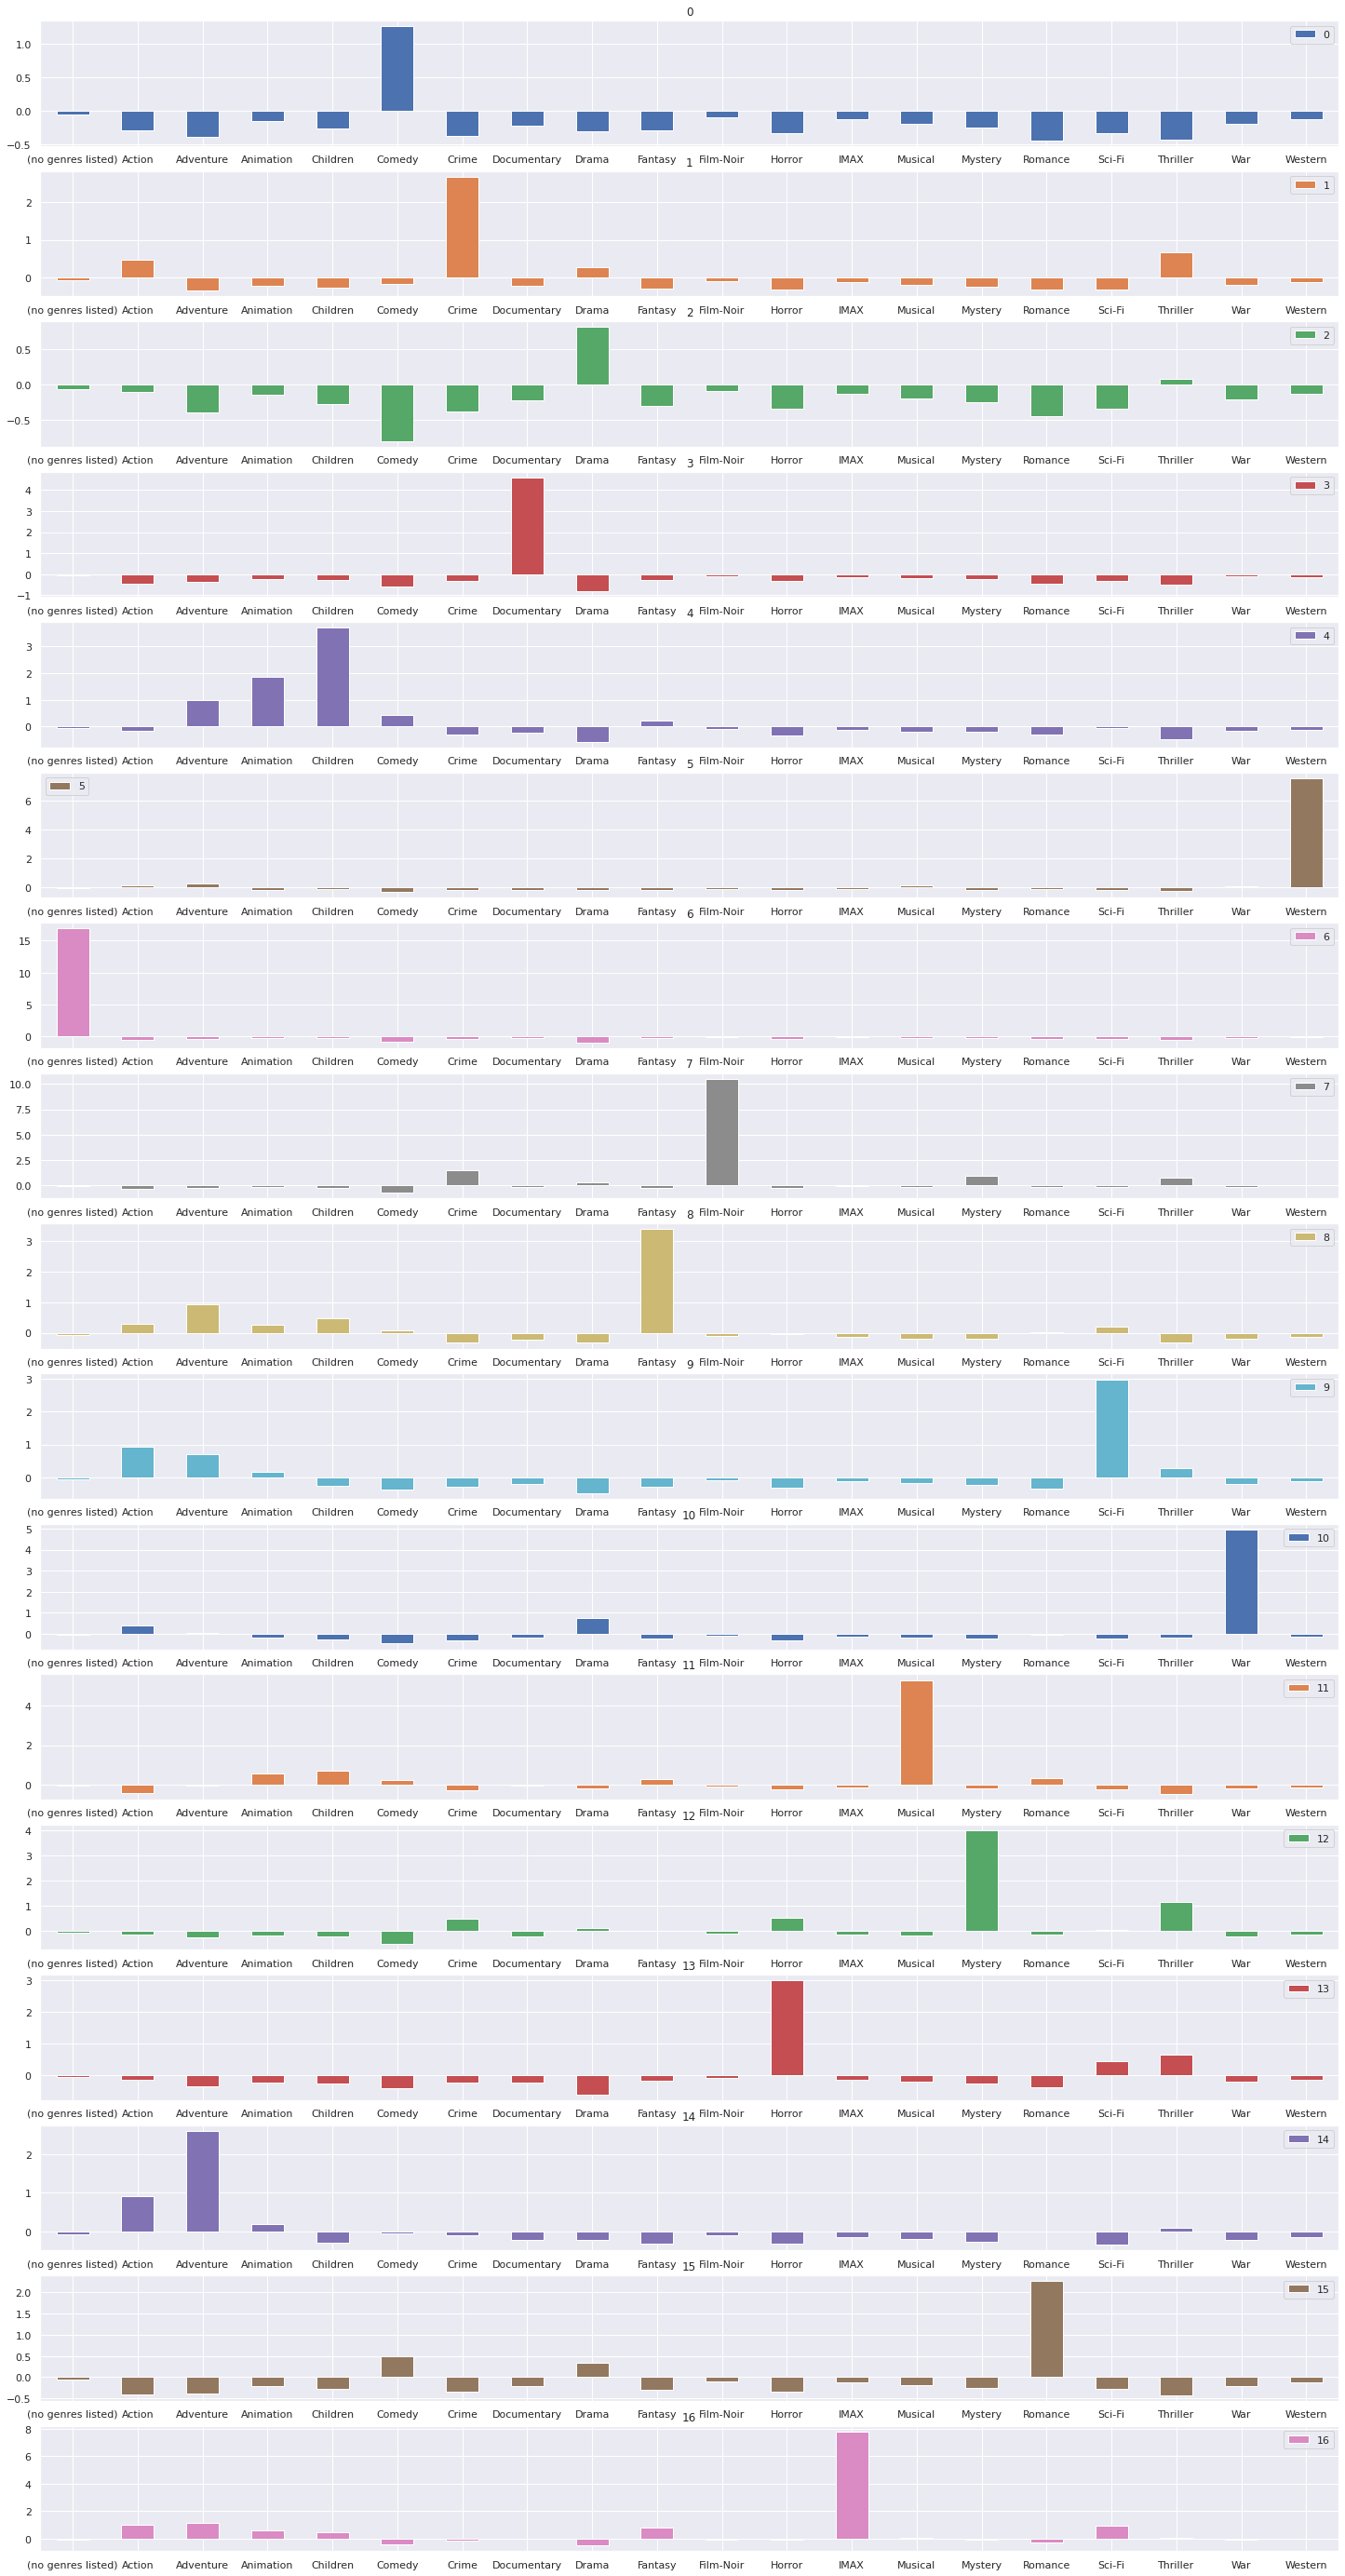

In [73]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [76]:
grupo = 16
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8068,99149,"Misérables, Les (2012)",Drama|Musical|Romance|IMAX,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
8414,110730,Transcendence (2014),Drama|Sci-Fi|IMAX,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8122,101112,Oz the Great and Powerful (2013),Action|Adventure|Fantasy|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7927,95510,"Amazing Spider-Man, The (2012)",Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5166,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3294,4454,More (1998),Animation|Drama|Sci-Fi|IMAX,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7467,81847,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...,0,0,0,1,1,1,0,...,0,0,1,1,0,1,0,0,0,0
6151,44191,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7769,91535,"Bourne Legacy, The (2012)",Action|Adventure|Drama|Thriller|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8199,103253,Elysium (2013),Action|Drama|Sci-Fi|IMAX,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### Com o kmeans pode agrupar por:
- Agrupamento particionado
    - Os que geram clusters.
- Agrupamento hierárquico
    - Por este tipo, são criado os gráficos chamados de Dendogramas.

In [78]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos


array([ 5, 14, 13, ...,  2,  5,  3])

In [79]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-18.550732 , -57.227177 ],
       [  6.8157682,  58.074017 ],
       [-13.026888 ,  19.696583 ],
       ...,
       [  9.286423 ,   1.758684 ],
       [  4.007222 , -39.469265 ],
       [-25.291157 , -12.999011 ]], dtype=float32)

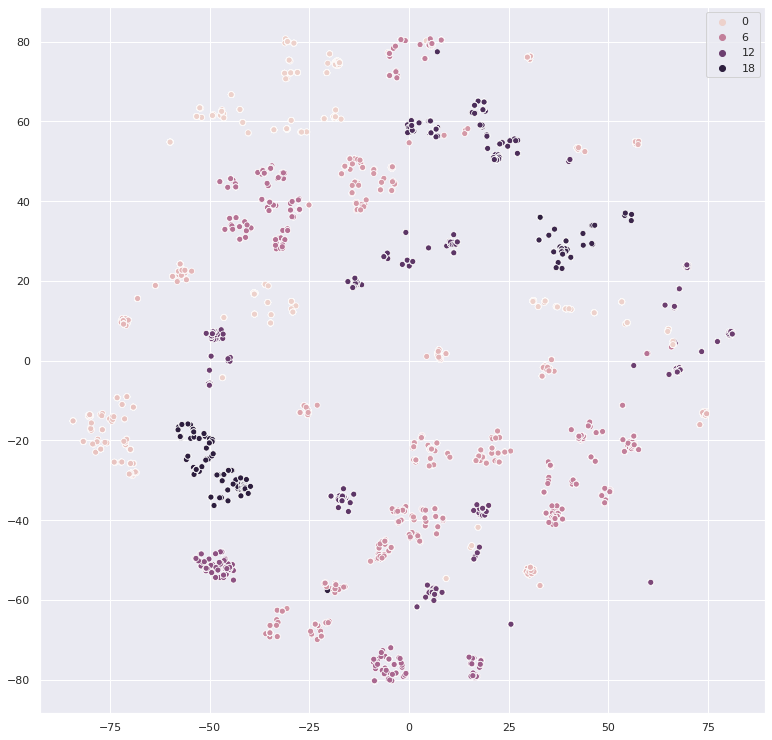

In [83]:
# Aqui,sem informar quantos clusters, ele vai criar os grupos mais proximos.
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
               hue=grupos)

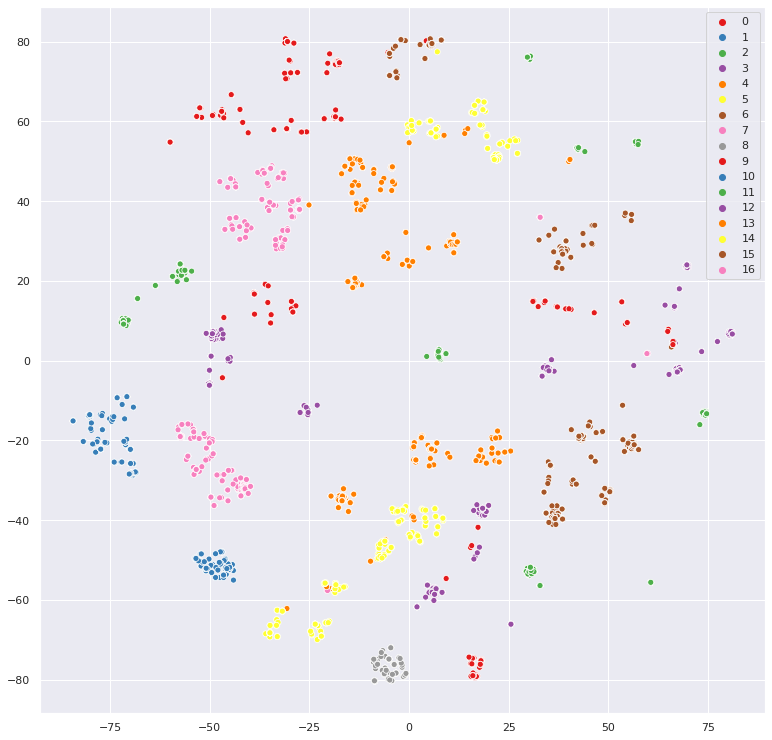

In [82]:
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=grupos,
                palette=sns.color_palette('Set1',17))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c4c6c6ed0>,
      dtype=object)

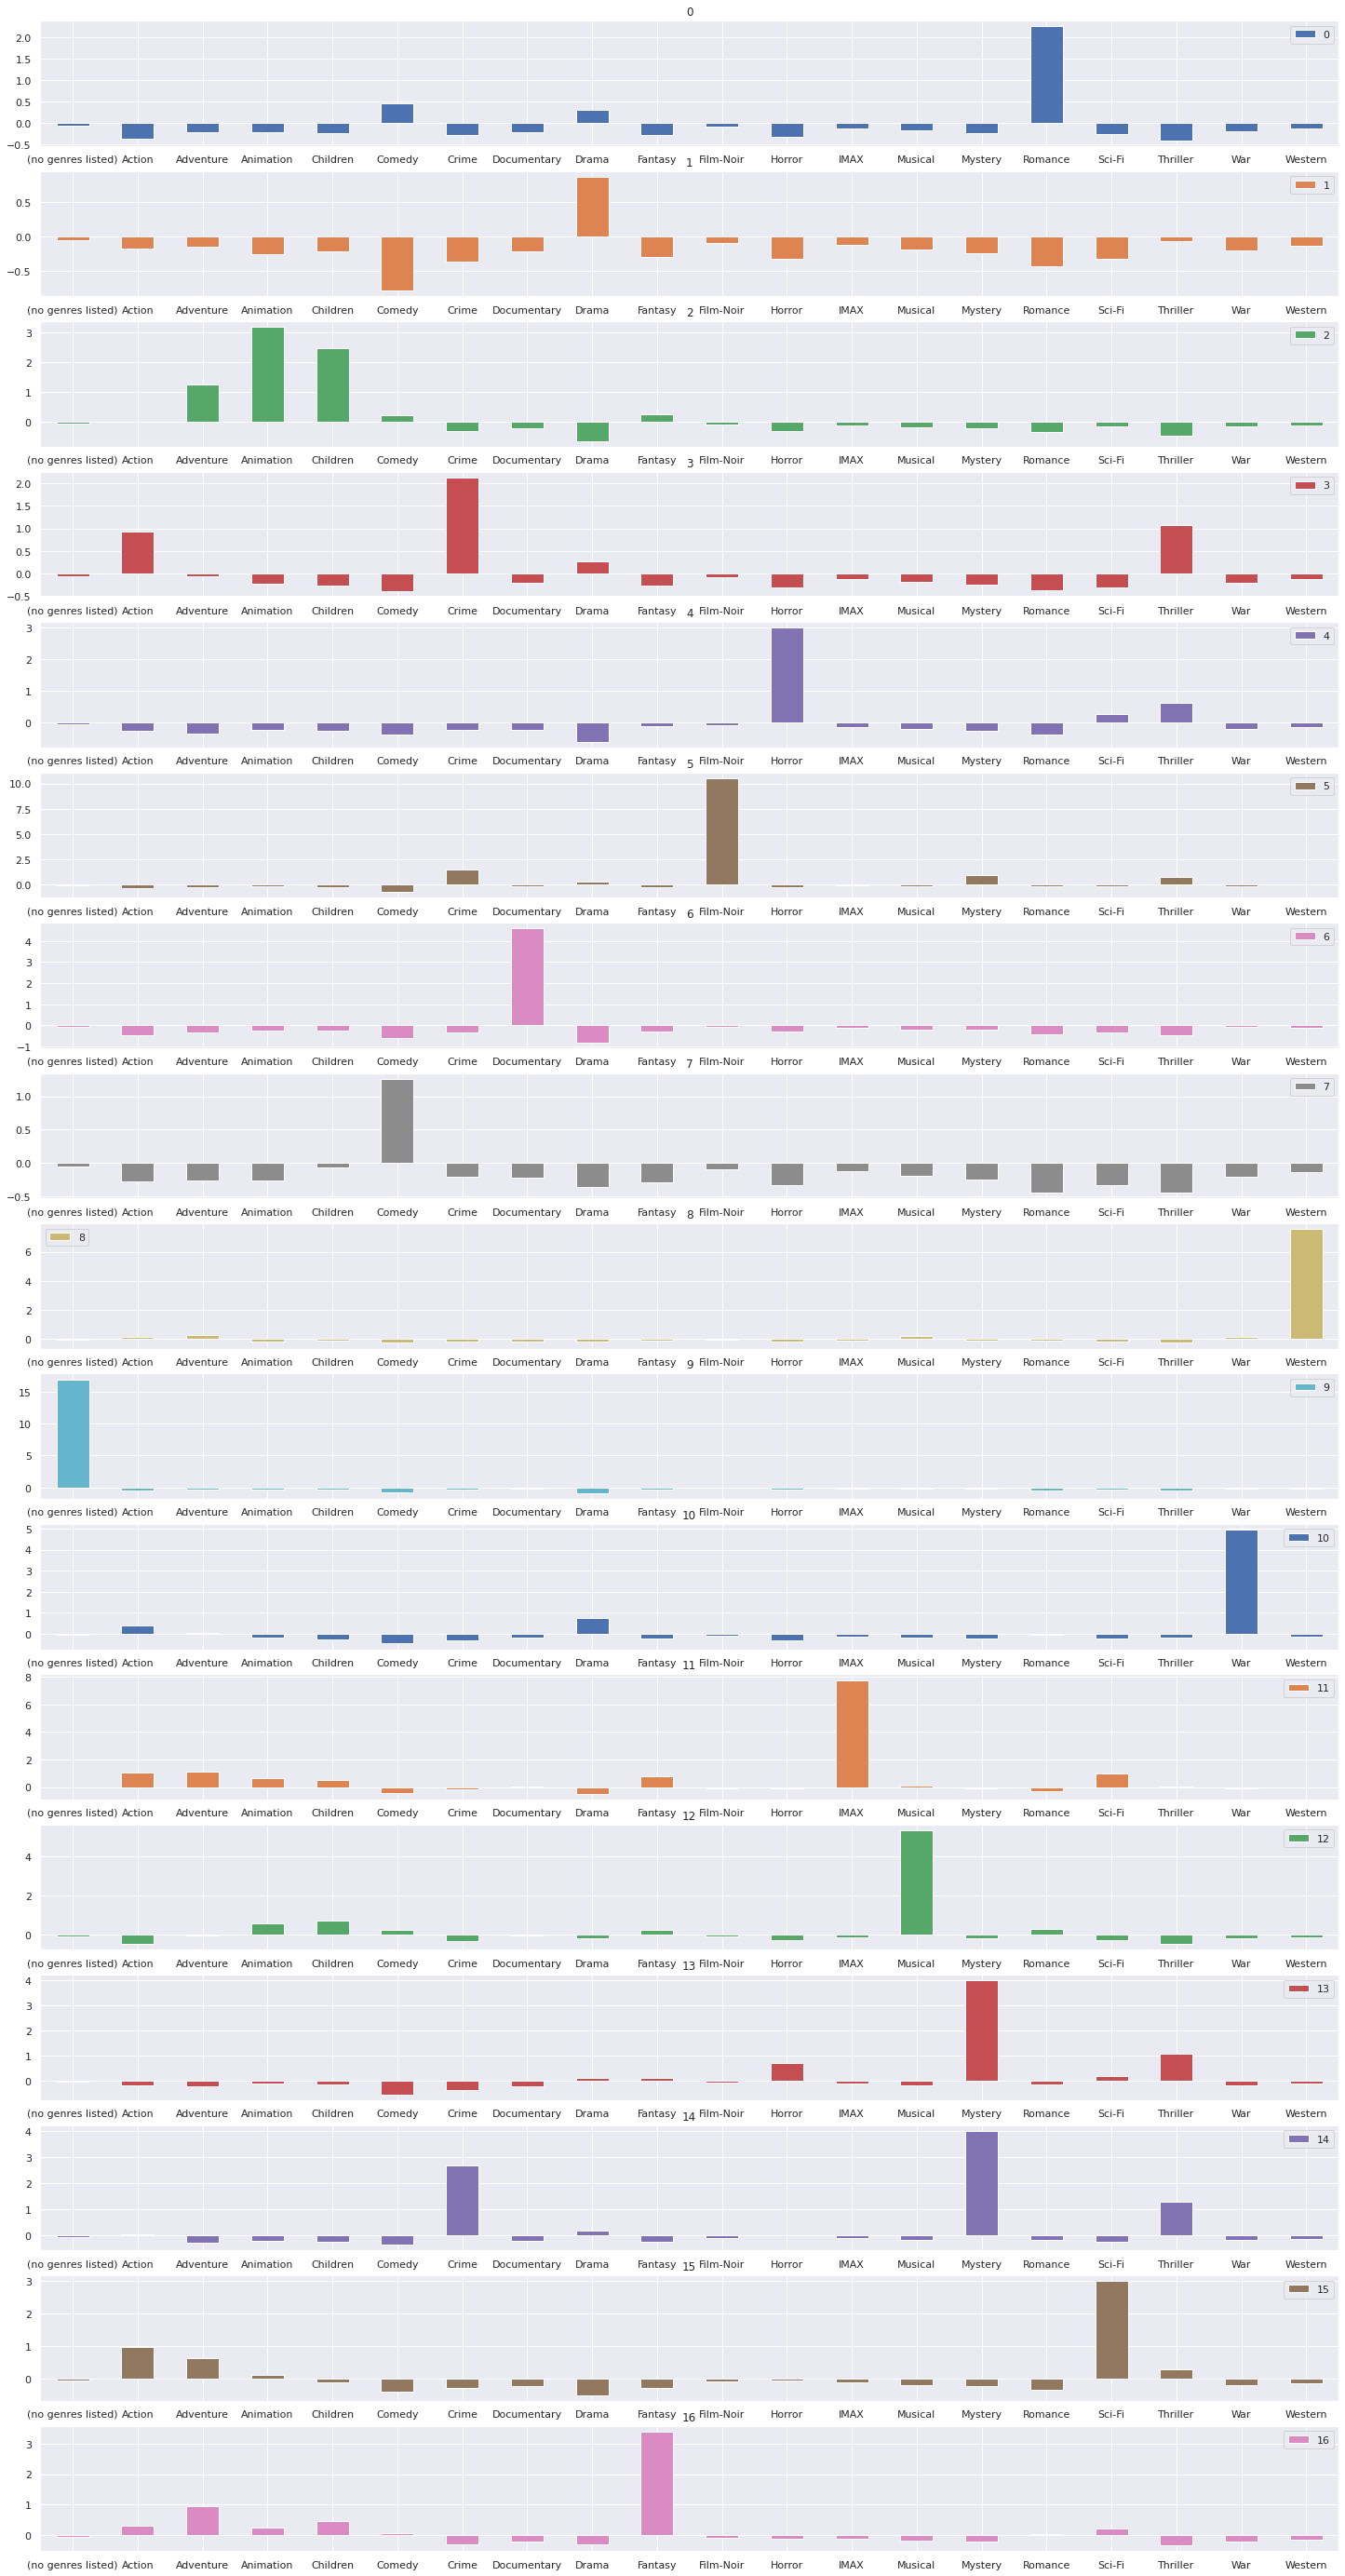

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)

In [86]:
matriz_de_distancias = linkage(grupos)
matriz_de_distancias

array([[ 1.        ,  7.        ,  2.43666544,  2.        ],
       [ 0.        , 17.        ,  2.90883179,  3.        ],
       [ 3.        , 18.        ,  3.05674169,  4.        ],
       [13.        , 14.        ,  3.20788832,  2.        ],
       [ 4.        , 19.        ,  3.78722335,  5.        ],
       [15.        , 21.        ,  3.92681542,  6.        ],
       [16.        , 22.        ,  4.23529239,  7.        ],
       [20.        , 23.        ,  4.40444454,  9.        ],
       [ 2.        , 24.        ,  4.70596035, 10.        ],
       [ 6.        , 25.        ,  5.13272242, 11.        ],
       [10.        , 26.        ,  5.21938059, 12.        ],
       [12.        , 27.        ,  5.79669916, 13.        ],
       [ 8.        , 28.        ,  7.83782797, 14.        ],
       [11.        , 29.        ,  8.31097612, 15.        ],
       [ 5.        , 30.        , 10.80761979, 16.        ],
       [ 9.        , 31.        , 17.05824969, 17.        ]])

{'icoord': [[85.0, 85.0, 95.0, 95.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [105.0, 105.0, 124.6875, 124.6875],
  [90.0, 90.0, 114.84375, 114.84375],
  [75.0, 75.0, 102.421875, 102.421875],
  [65.0, 65.0, 88.7109375, 88.7109375],
  [55.0, 55.0, 76.85546875, 76.85546875],
  [45.0, 45.0, 65.927734375, 65.927734375],
  [35.0, 35.0, 55.4638671875, 55.4638671875],
  [25.0, 25.0, 45.23193359375, 45.23193359375],
  [15.0, 15.0, 35.115966796875, 35.115966796875],
  [5.0, 5.0, 25.0579833984375, 25.0579833984375]],
 'dcoord': [[0.0, 3.207888321958479, 3.207888321958479, 0.0],
  [0.0, 2.43666544297971, 2.43666544297971, 0.0],
  [0.0, 2.9088317927658287, 2.9088317927658287, 2.43666544297971],
  [0.0, 3.056741685675449, 3.056741685675449, 2.9088317927658287],
  [0.0, 3.7872233460336777, 3.7872233460336777, 3.056741685675449],
  [0.0, 3.9268154224677025, 3.926815422467702

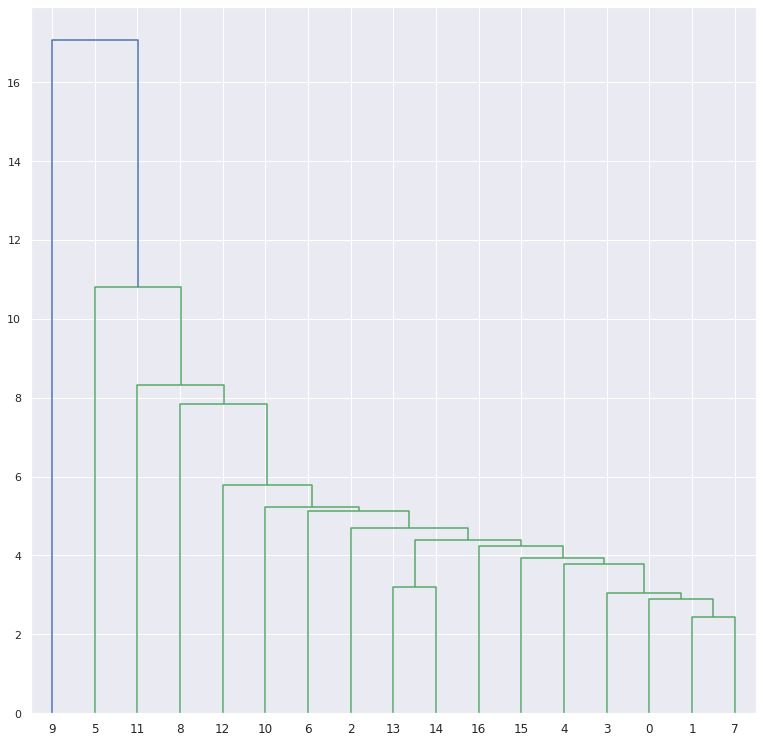

In [88]:
dendrograma = dendrogram(matriz_de_distancias)
dendrograma
